In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install pandas 


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd

In [5]:
data = pd.read_csv(r"C:\Users\SURYANSHI\OneDrive\Desktop\Project 1\dirty_cafe_sales.csv")

In [6]:
data.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [7]:
data.shape

(10000, 8)

In [8]:
data.isnull().mean()*100

Transaction ID       0.00
Item                 3.33
Quantity             1.38
Price Per Unit       1.79
Total Spent          1.73
Payment Method      25.79
Location            32.65
Transaction Date     1.59
dtype: float64

In [9]:
data['Item'].value_counts() 

Item
Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
UNKNOWN      344
ERROR        292
Name: count, dtype: int64

In [10]:
data.replace(['UNKNOWN' , 'ERROR'] , np.nan , inplace = True)

In [11]:
data.isnull().mean()*100

Transaction ID       0.00
Item                 9.69
Quantity             4.79
Price Per Unit       5.33
Total Spent          5.02
Payment Method      31.78
Location            39.61
Transaction Date     4.60
dtype: float64

In [12]:
round(data['Item'].value_counts(normalize = True , ascending = True)*100 , 2)

Item
Tea         12.06
Cookie      12.09
Smoothie    12.14
Sandwich    12.52
Cake        12.61
Salad       12.71
Coffee      12.90
Juice       12.97
Name: proportion, dtype: float64

**Handling Missing Values in the "Item" Column**  

Since **9.69%** of the data in the "Item" column is missing and the ratio of other items is approximately **12% each**, the difference is not significant. This suggests that the missing values could belong to a **single product** that is not recorded correctly due to the following possible reasons:  

1. **Data Entry Issue** – The item might not have been logged due to a system or human error.  
2. **Untracked Product** – A specific product might exist but was not categorized properly in the dataset.  
3. **Intentional Omission** – The missing values could be due to an intentional business or operational decision.  

Since this missing category could be a valid product, we are filling the null values with **"SomeProduct"** as a placeholder. However, this assumption **must be verified with domain experts** before making any final decisions, such as removing the product from the analysis.  

In [13]:
data['Item'].fillna("SomeProduct", inplace=True)

C:\Users\SURYANSHI\AppData\Local\Temp\ipykernel_15112\2310324959.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Item'].fillna("SomeProduct", inplace=True)


In [14]:
data[data['Quantity'].isnull()]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
20,TXN_3522028,Smoothie,NaN,4.0,20.0,Cash,In-store,2023-04-04
55,TXN_5522862,Cookie,NaN,1.0,2.0,Credit Card,Takeaway,2023-03-19
57,TXN_2080895,Cake,NaN,3.0,3.0,Digital Wallet,In-store,2023-04-19
66,TXN_8501819,Juice,NaN,3.0,6.0,Cash,NaN,2023-03-30
117,TXN_2148617,Juice,NaN,3.0,9.0,Digital Wallet,NaN,2023-01-10
...,...,...,...,...,...,...,...,...
9932,TXN_8502079,Tea,NaN,1.5,3.0,Cash,NaN,2023-04-20
9935,TXN_9778251,Tea,NaN,1.5,6.0,NaN,Takeaway,2023-11-09
9944,TXN_7495283,Cake,NaN,3.0,15.0,Credit Card,Takeaway,2023-04-14
9957,TXN_6487003,Coffee,NaN,2.0,8.0,Credit Card,Takeaway,2023-11-15


In [15]:
print(data.dtypes)

Transaction ID      object
Item                object
Quantity            object
Price Per Unit      object
Total Spent         object
Payment Method      object
Location            object
Transaction Date    object
dtype: object


In [16]:
data['Quantity'] = pd.to_numeric(data['Quantity'] , errors = 'coerce')
data['Total Spent'] = pd.to_numeric(data['Total Spent'] , errors = 'coerce')
data['Price Per Unit'] = pd.to_numeric(data['Price Per Unit'] , errors = 'coerce')

In [17]:
data.loc[data['Quantity'].isnull() & data['Price Per Unit'].notna() & data['Total Spent'].notna() , 'Quantity'] = data['Total Spent'] / data['Price Per Unit']

In [18]:
data.loc[data['Price Per Unit'].isna() & data['Quantity'].notna() & data['Total Spent'].notna() , 'Price Per Unit'] = data['Total Spent'] / data['Quantity']
data.loc[ data['Total Spent'].isna() & data['Price Per Unit'].notna() & data['Quantity'].notna()  , 'Total Spent'] = data['Price Per Unit'] * data['Quantity']

In [19]:
data.head(1)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08


In [20]:
data.isnull().sum()

Transaction ID         0
Item                   0
Quantity              38
Price Per Unit        38
Total Spent           40
Payment Method      3178
Location            3961
Transaction Date     460
dtype: int64

In [21]:
data[data['Quantity'].isna() | data['Price Per Unit'].isna() | data['Total Spent'].isna()].shape

(58, 8)

Since the total is very less we can choose to drop it.

In [22]:
row_to_drop = data[data['Quantity'].isna() | data['Price Per Unit'].isna() | data['Total Spent'].isna()]
data.drop(row_to_drop.index , inplace=True)

In [23]:
data.isnull().sum()

Transaction ID         0
Item                   0
Quantity               0
Price Per Unit         0
Total Spent            0
Payment Method      3158
Location            3940
Transaction Date     457
dtype: int64

In [24]:
data['Payment Method'].value_counts(normalize=True)

Payment Method
Digital Wallet    0.336085
Credit Card       0.333137
Cash              0.330778
Name: proportion, dtype: float64

In [25]:
data['Location'].value_counts(normalize=True)

Location
Takeaway    0.5005
In-store    0.4995
Name: proportion, dtype: float64

In [26]:
data[data['Location'] == 'In-store']

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
9,TXN_2064365,Sandwich,5.0,4.0,20.0,NaN,In-store,2023-12-31
12,TXN_7619095,Sandwich,2.0,4.0,8.0,Cash,In-store,2023-05-03
...,...,...,...,...,...,...,...,...
9977,TXN_5548914,Juice,2.0,3.0,6.0,Digital Wallet,In-store,2023-11-04
9979,TXN_9933628,Smoothie,5.0,4.0,20.0,Cash,In-store,2023-07-20
9986,TXN_2858441,Sandwich,2.0,4.0,8.0,Credit Card,In-store,2023-12-14
9992,TXN_2739140,Smoothie,4.0,4.0,16.0,NaN,In-store,2023-07-05


In [27]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


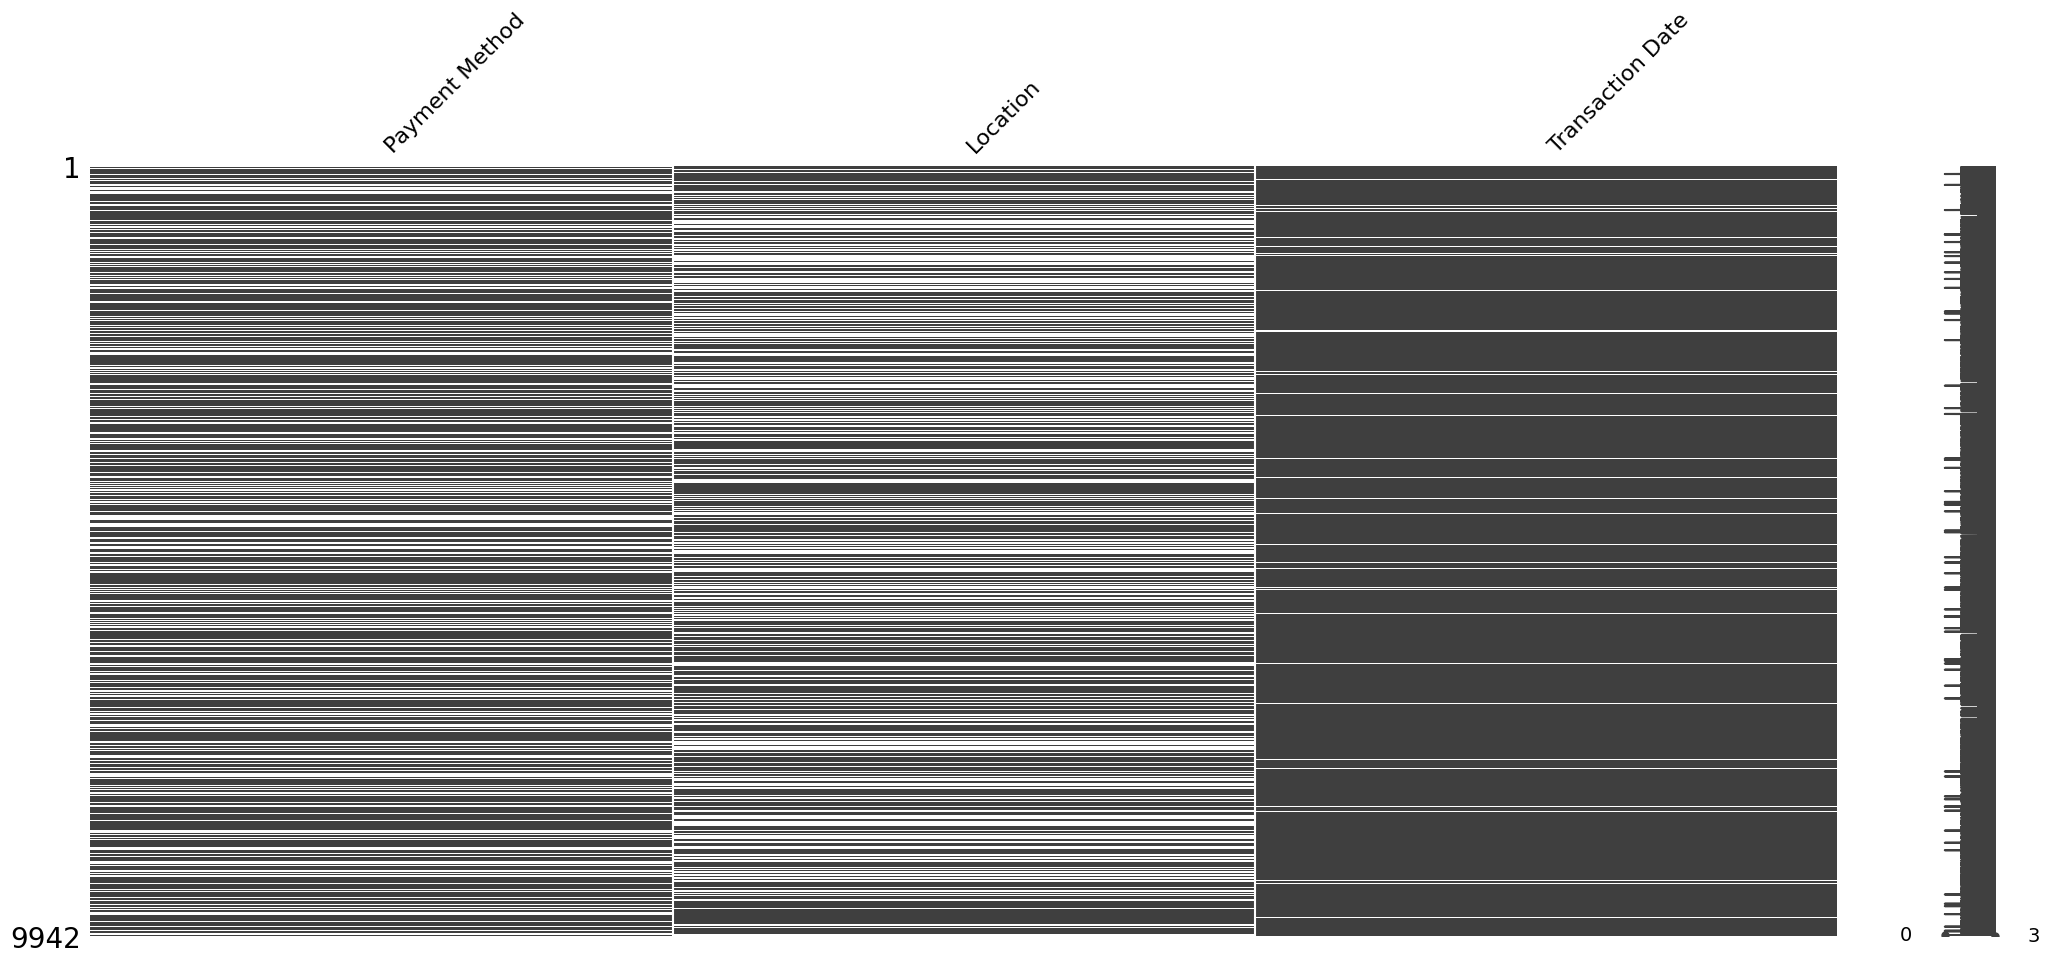

In [28]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missingness
msno.matrix(data[['Payment Method' , 'Location' , 'Transaction Date']])
plt.show()

The figure suggests that the missing value is mostly as random so we can fill that with the porportion present that in both location and Payment Method column.

In [29]:
location_proportions = data['Location'].value_counts(normalize=True)
payment_proportions = data['Payment Method'].value_counts(normalize=True)

In [30]:
location_proportions

Location
Takeaway    0.5005
In-store    0.4995
Name: proportion, dtype: float64

In [31]:
data['Location'] = data['Location'].apply(lambda x: np.random.choice(location_proportions.index, p=location_proportions.values) if pd.isna(x) else x)
data['Payment Method'] = data['Payment Method'].apply(lambda x: np.random.choice(payment_proportions.index, p=payment_proportions.values) if pd.isna(x) else x)

In [32]:
data.shape

(9942, 8)

In [33]:
data.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,Digital Wallet,In-store,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [35]:
data.isna().sum()

Transaction ID        0
Item                  0
Quantity              0
Price Per Unit        0
Total Spent           0
Payment Method        0
Location              0
Transaction Date    457
dtype: int64

In [36]:
data = data[~data['Transaction Date'].isnull()]

In [37]:
data.shape

(9485, 8)